<img style="float: left;;" src='Figures/alinco.png' /></a>

# Modulo II: Funciones Hash y Multiplanos

# Hash functions and multiplanes


Veremos algunos conceptos acerca de las funciones hash.

Un punto clave para la búsqueda mediante funciones hash es el cálculo de la clave hash o la identificación del bucket que asignamos para una entrada determinada. Esta vez verermos:


* Tablas Hash Básicas
* Multiplanos
* Planos aleatorios

## Tabla Hash Básicas

Las tablas hash son estructuras de datos que permiten indexar datos para hacer que las tareas de búsqueda sean más eficientes.
En esta parte, veremos la implementación de la función hash más simple.

In [7]:
#Librerías
import numpy as np
import pprint 
import matplotlib.pyplot as plt



En la siguiente celda, definiremos una función hash sencilla para números enteros. La función recibirá una lista de números enteros y la cantidad deseada de buckets. La función producirá una tabla hash almacenada como un diccionario, donde las claves contienen las claves hash, y los valores proporcionarán los elementos hash de la lista de entrada.

La función hash es solo el resto de la división entera entre cada elemento y el número deseado de buckets.


In [8]:
#Función Hash
def hash_function(value, n_buckets):
    return int(value) % n_buckets

def basic_hash_table(value_l, n_buckets):
    
    hash_table = {i: [] for i in range(n_buckets)}
    
    for value in value_l:
        hash_value = hash_function(value, n_buckets)
        hash_table[hash_value].append(value)
        
    return hash_table
    

Ahora veamos la función hash en acción. 

In [10]:
value_l = [100, 10, 14, 17, 97]
hash_table_example = basic_hash_table(value_l, n_buckets=10)
hash_table_example

{0: [100, 10],
 1: [],
 2: [],
 3: [],
 4: [14],
 5: [],
 6: [],
 7: [17, 97],
 8: [],
 9: []}

En este caso, la clave del bucket debe ser el dígito situado más a la derecha de cada número.

## Planos

Las funciones hash multiplanos son otros tipos de funciones hash. Las funciones hash de multiplanos se basan en la idea de numerar cada región que está formada por la intersección de n planos. En el siguiente código, mostramos las formas más básicas del principio de multiplanos. Primero, con un solo plano:


In [11]:
def plot_vectors(vectors, colors=['k', 'b', 'r', 'm', 'c'], axes=None, fname='image.svg', ax=None):
    scale = 1
    scale_units = 'x'
    x_dir = []
    y_dir = []
    
    for i, vec in enumerate(vectors):
        x_dir.append(vec[0][0])
        y_dir.append(vec[0][1])
    
    if ax == None:
        fig, ax2 = plt.subplots()
    else:
        ax2 = ax
      
    if axes == None:
        x_axis = 2 + np.max(np.abs(x_dir))
        y_axis = 2 + np.max(np.abs(y_dir))
    else:
        x_axis = axes[0]
        y_axis = axes[1]
        
    ax2.axis([-x_axis, x_axis, -y_axis, y_axis])
        
    for i, vec in enumerate(vectors):
        ax2.arrow(0, 0, vec[0][0], vec[0][1], head_width=0.05 * x_axis, head_length=0.05 * y_axis, fc=colors[i], ec=colors[i])
    
    if ax == None:
        plt.show()
        fig.savefig(fname)


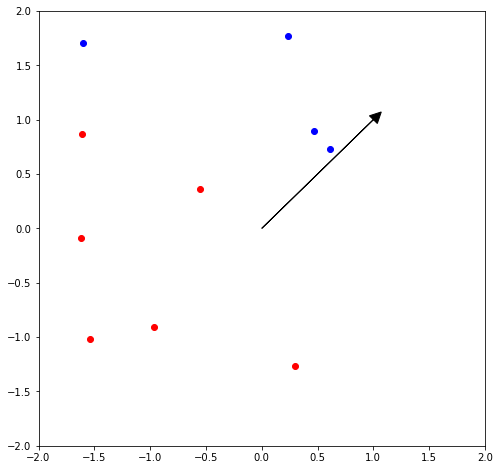

In [14]:
#Ploteo de planos

P = np.array([[1,1]])

fig,ax1 = plt.subplots(figsize=(8,8))
plot_vectors([P], axes=[2,2], ax=ax1)

for i in range(0,10):
    v1 = np.array(np.random.uniform(-2,2,2))
    side_of_plane = np.sign(np.dot(P,v1.T))
    
    if side_of_plane ==1:
        ax1.plot([v1[0]],[v1[1]], 'bo')
    else:
        ax1.plot([v1[0]],[v1[1]], 'ro')
        
plt.show()

In [15]:
P = np.array([[1,1]])

In [16]:
v1= np.array([[1,2]])
v2= np.array([[-1,1]])
v3= np.array([[-2,-1]])

In [17]:
np.dot(P,v1.T)

array([[3]])

In [18]:
np.dot(P,v3.T)

array([[-3]])

In [19]:
def side_of_plane(P,v):
    dotprod = np.dot(P,v.T)
    sing_dotprod = np.sign(dotprod)
    sing_dotprod_scalar = sing_dotprod.item()
    
    return sing_dotprod_scalar
    
    

In [20]:
side_of_plane(P, v1)

1

In [21]:
side_of_plane(P, v3)

-1


Lo primero que hay que tener en cuenta es que el vector que define el plano no marca el límite entre los dos lados del plano. Marca la dirección en la que encuentra el lado "positivo" del plano.

Si queremos trazar el plano de separación, necesitamos trazar una línea que sea perpendicular a nuestro vector "P". Podemos obtener dicha línea usando una matriz de rotación de $ 90^o $.



Now, let us see what is inside the code that color the points. 

La siguiente función comprueba en qué lado del plano P se encuentra el vector `v`

In [4]:
#Función para saber de que lado del plano está

## Hash Function con multiples planos

En la siguiente sección, vamos a definir una función hash con una lista de tres planos personalizados en 2D.

In [23]:
P1 = np.array([[1,1]])
P2 = np.array([[-1,1]])
P3 = np.array([[-1,-1]])

P_l = [P1, P2, P3]

v=np.array([[2,2]])



La siguiente función crea un valor hash basado en un conjunto de planos. El valor de salida es una combinación del lado del plano donde se localiza el vector con respecto a la colección de planos.

Podemos pensar en esta lista de planos como un conjunto de funciones hash básicas, cada una de las cuales puede producir solo 1 o 0 como salida.

In [24]:
#hash multiplano
def hash_multi_plane(P_l, v):
    hash_value = 0
    for i, P in enumerate(P_l):
        sign = side_of_plane(P,v)
        hash_i = 1 if sign>= 0 else 0
        hash_value += 2**i * hash_i
    return hash_value
        

In [36]:
v1=np.array([[-.2,.2]])
v2=np.array([[-1000,1000]])
v3=np.array([[-5,5]])

vx= [x,-x]

In [37]:
hash_multi_plane(P_l, v2)

7

## Planos Aleatorios



In [38]:
np.random.seed(0)
num_dimensions=2
num_planes = 3

random_planes_matrix = np.random.normal(size=(num_planes, num_dimensions))


print(random_planes_matrix)

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]


In [39]:

v=np.array([[2,2]])

La siguiente función es similar a la función `side_of_plane ()`, pero evalúa más de un plano cada vez. El resultado es una matriz con el lado del plano de `v`, para el conjunto de planos` P`

In [40]:
def side_of_plane_matrix(P,v):
    dotprod = np.dot(P,v.T)
    sign_of_dotprod = np.sign(dotprod)
    return sign_of_dotprod

    
    

Obtenga el lado del plano del vector `[2, 2]` para el conjunto de planos aleatorios.

In [41]:
sides_l = side_of_plane_matrix(random_planes_matrix, v)

sides_l

array([[1.],
       [1.],
       [1.]])

In [44]:
def hash_multi_plane_matrix(P, v, num_planes):
    sides_matrix = side_of_plane_matrix(P, v)
    
    hash_value = 0
    for i in range(num_planes):
        sign = sides_matrix[i].item()
        hash_i = 1 if sign>= 0 else 0
        hash_value += 2**i * hash_i
    return hash_value
        

Imprime el hash del bucket para el vector `v = [2, 2]`. 

In [45]:
hash_multi_plane_matrix(random_planes_matrix,v,num_planes)

7

#### Nota

Esto muestra cómo hacer un conjunto de planos aleatorios. Haremos varios conjuntos de planos aleatorios para obtener que los vecinos más cercanos sean más precisos.


## Vectores documentos

Recuerde que puede representar un documento como un vector sumando los vectores de palabras para las palabras dentro del documento. En este ejemplo, los wordembeddings contienen solo tres palabras, cada una representada por una arreglo de dimensión 3.



In [6]:
# wordembeddings